In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn as sk

In [111]:
#Get data from ROOT file
file = ur.open("/mnt/scratch3/dmisra/zdcdata_current/zdc_neutron_100GeV_10e4.edm4hep.root")
tree = file["events"]
branches = tree.arrays()

In [ ]:
crossingangle = -0.025

SiliconHits_z = branches["ZDC_SiliconPix_Hits.position.z"]
CrystalHits_z = branches["ZDCEcalHits.position.z"]
WSiHits_z = branches["ZDC_WSi_Hits.position.z"]
PbScintiHits_z = branches["ZDCHcalHits.position.z"]
PbSiHits_z = branches["ZDC_PbSi_Hits.position.z"]

SiliconHits_x = branches["ZDC_SiliconPix_Hits.position.x"]
CrystalHits_x = branches["ZDCEcalHits.position.x"]
WSiHits_x = branches["ZDC_WSi_Hits.position.x"]
PbScintiHits_x = branches["ZDCHcalHits.position.x"]
PbSiHits_x = branches["ZDC_PbSi_Hits.position.x"]

def rotate(a): 
        return a[0] * np.sin(crossingangle) + a[1] * np.cos(crossingangle)

In [ ]:
maxlist = []
        
for i in range(10000):
        ECalArray = []
        HCalArray = []
        ZArray = []

        SiArray = list(zip(SiliconHits_x[i], SiliconHits_z[i]))
        CrystalArray = list(zip(CrystalHits_x[i], CrystalHits_z[i]))
        WSiArray = list(zip(WSiHits_x[i], WSiHits_z[i]))

        ECalArray.extend(SiArray)
        ECalArray.extend(CrystalArray)
        ECalArray.extend(WSiArray)

        PbSiArray = list(zip(PbSiHits_x[i], PbSiHits_z[i]))
        PbScintiArray = list(zip(PbScintiHits_x[i], PbScintiHits_z[i]))

        HCalArray.extend(PbSiArray)
        HCalArray.extend(PbScintiArray)

        ZArray.extend(ECalArray)
        ZArray.extend(HCalArray)

        ZArray_rot = list(map(rotate, np.array(ZArray)))

        maxlist.append(max(ZArray_rot, default=0))

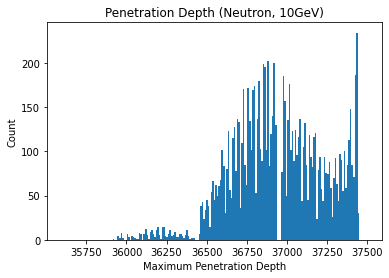

In [110]:
#Create histogram
plt.hist(maxlist,bins=np.linspace(35600,37500,200));
plt.xlabel("Maximum Penetration Depth")
plt.ylabel("Count")
plt.title("Penetration Depth (Neutron, 100GeV)")
plt.savefig("depth_100GeV.pdf")